# ***** Libraries ***** 

In [3]:
import pandas as pd

from astropy.table import Table
from astropy.io import fits

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad

# ***** References ***** 

* (Amati, 2002) -- Amati, L., “Intrinsic spectra and energetics of BeppoSAX Gamma-Ray Bursts with known redshifts”, Astronomy and Astrophysics, vol. 390, pp. 81–89, 2002. doi:10.1051/0004-6361:20020722.

* (Bloom, 2001) -- Bloom, J. S., Frail, D. A., and Sari, R., “The Prompt Energy Release of Gamma-Ray Bursts using a Cosmological k-Correction”, The Astronomical Journal, vol. 121, no. 6, pp. 2879–2888, 2001. doi:10.1086/321093.

* FERMIGBRST - Fermi GBM Burst Catalog https://heasarc.gsfc.nasa.gov/W3Browse/fermi/fermigbrst.html

* (Yonetoku, 2004) -- Yonetoku, D., Murakami, T., Nakamura, T., Yamazaki, R., Inoue, A. K., and Ioka, K., “Gamma-Ray Burst Formation Rate Inferred from the Spectral Peak Energy-Peak Luminosity Relation”, The Astrophysical Journal, vol. 609, no. 2, pp. 935–951, 2004. doi:10.1086/421285.

* (Zhang, 2018) -- Zhang, B. (2018). The Physics of Gamma-Ray Bursts. Cambridge: Cambridge University Press. doi:10.1017/9781139226530

# ***** Functions *****

#### Constants:

In [4]:
# Cosmology constants
# from Planck 2015
H0 = 67.8; # km/s/Mpc
omegaM, omegaK, omegaL = 0.308, 0, 0.692
c = 2.998e10
pi=np.pi
kevToErg = 1.602e-9
mpcToCm = 3.086e24
kmToCm = 1e5

In [13]:
#class models:
    
def get_E_peak_rest_frame(E_peak_obs,redshift):
    """
    Returns rest-frame peak energy
    E_peak_obs -- observed peak energy, from catalogue
    redshift -- redshift of object
    (Zhang, 2018, p. 102)
    """
    return (1 + redshift) * E_peak_obs

def get_k_correction():
    """
    (Bloom, 2001)
    """
    pass

def luminosity_distance(redshift):
    """
    Returns luminosiity distance
    !!! Y.'s code
    """
    dH = c*mpcToCm/kmToCm/H0 #constants
    function = lambda x: (1/np.sqrt(omegaM*(1+x)**3+omegaK*(1+x)**2+omegaL))
    lower, upper = 0, redshift
    return dH * (1 + redshift) * quad(function,lower,upper)[0]

def get_L_iso_bol_peak(dist_lum,peak_flux,k_c):
    """
    Returns isotropic bolometric peak luminosity 
    dist_lum -- 
    peak_flux --
    k_c --
    """
    return 4 * 3.141592653589793 * dist_lum**2 * peak_flux * k_c

def luminosity_power_low(E_peak, redshift):
    """
    (Yonetoku, 2004) correlation between peak luminosity
    and peak energy.
    Based on (Amati, 2002) and (Yonetoku, 2004) data
    """
    luminosity = 2.34 * 1e-5 * (E_peak * (1 + redshift) / 1e3)**2 * 1e52
    luminosity_upper = (2.34+2.29) * 1e-5 * (E_peak * (1 + redshift) / 1e3)**(2-0.2) * 1e52
    luminosity_lower = (2.34-1.76) * 1e-5 * (E_peak * (1 + redshift) / 1e3)**(2+0.2) * 1e52
    
    return luminosity, luminosity_upper, luminosity_lower

# ***** Data *****

## - - - - - - - - - - - - - 
## (Yonetoku, 2004)

### --- Figure 1 and Table 1 ---

In [14]:
yonetoku_data_st = pd.read_csv("2004_yonetoku_grb_table_2.csv")

In [15]:
yonetoku_data_st.columns

Index(['grb', 'redshift', 'ra', 'dec', 'Ep(1+z), (keV)',
       'peak flux, (10-6ergs cm-2s-1)', 'Peak Luminosity,  1052ergs s-1',
       'hi2/dof', 'k_c'],
      dtype='object')

In [16]:
redshift = np.array([1,1,1,1,1,1,1,1,1,1,1])

Text(0, 0.5, '$Luminosity~[\\times 10^{52} erg/s]$')

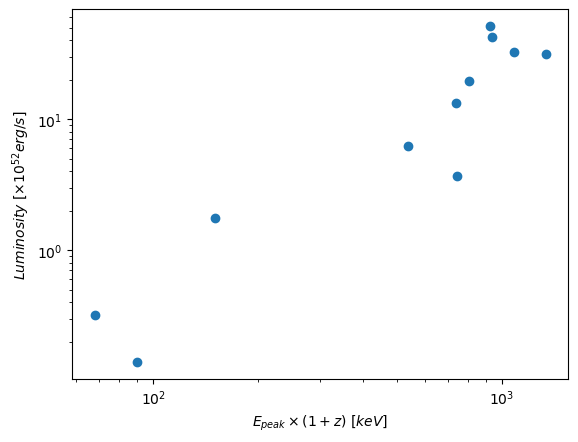

In [17]:
plt.scatter(yonetoku_data_st["Ep(1+z), (keV)"],yonetoku_data_st["Peak Luminosity,  1052ergs s-1"])
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$E_{peak} \times (1 + z)~[keV]$")
plt.ylabel(r"$Luminosity~[\times 10^{52} erg/s]$")

In [30]:
lum_model,lum_model_up,lum_model_low = luminosity_power_low(yonetoku_data_st["Ep(1+z), (keV)"]*1e3,redshift)

In [22]:
energy = np.log10(yonetoku_data_st["Ep(1+z), (keV)"])
luminosity = np.log10(yonetoku_data_st["Peak Luminosity,  1052ergs s-1"])
z = np.polyfit(energy,luminosity, 1)
polynomial = np.poly1d(z)
y_polynomial = polynomial(xp)

Text(0, 0.5, '$Luminosity~[\\times 10^{52} erg/s]$')

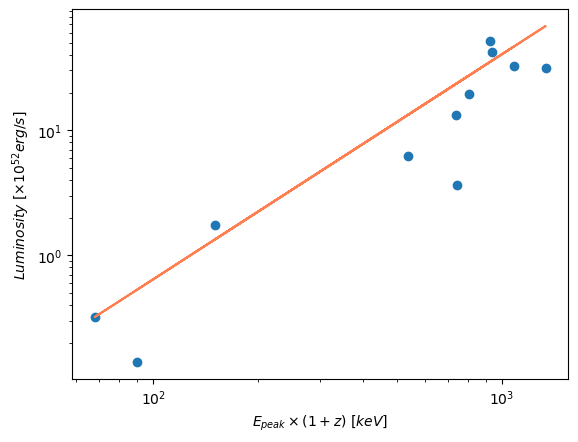

In [35]:
#plt.plot(yonetoku_data_st["Ep(1+z), (keV)"], lum_model/1e52, color="orange", label=f"Полином ({1}), mid")
plt.plot(yonetoku_data_st["Ep(1+z), (keV)"], lum_model_up/1e52, color="coral", label=f"Полином ({1}), up")
#plt.plot(yonetoku_data_st["Ep(1+z), (keV)"], lum_model_low/1e52, color="red", label=f"Полином ({1}), low")
plt.scatter(yonetoku_data_st["Ep(1+z), (keV)"],yonetoku_data_st["Peak Luminosity,  1052ergs s-1"])
plt.xscale("log")
plt.yscale("log")

plt.xlabel(r"$E_{peak} \times (1 + z)~[keV]$")
plt.ylabel(r"$Luminosity~[\times 10^{52} erg/s]$")

### --- Table 2 ---

In [81]:
yonetoku_data = pd.read_csv("2004_yonetoku_grb_energy_luminosity.csv")

In [82]:
yonetoku_data

,trigger_number,Ep,E_Ep,e_Ep,z,E_z,e_z,Lum,E_Lum,e_Lum
0,105,141.4,7.5,7.8,1.26,0.10,0.11,2.39E+52,4.300000e+51,5.200000e+51
1,109,385.4,18.8,20.7,1.98,0.17,0.20,3.10E+53,6.000000e+52,8.200000e+52
2,111,97.2,20.6,21.7,11.23,6.51,33.87,3.32E+53,2.870000e+53,6.720000e+54
3,130,182.2,7.1,7.4,5.17,0.57,0.68,2.97E+53,7.100000e+52,9.900000e+52
4,133,73.9,28.3,25.4,4.53,2.89,9.47,3.92E+52,3.580000e+52,4.820000e+53
...,...,...,...,...,...,...,...,...,...,...
684,8099,79.5,11.3,12.1,0.74,0.13,0.15,4.49E+51,1.660000e+51,2.540000e+51
685,8105,17.1,5.4,5.5,0.41,0.14,0.15,1.36E+50,8.400000e+49,1.550000e+50
686,8111,354.5,88.3,46.6,7.98,4.60,6.05,2.38E+54,2.060000e+54,6.150000e+54
687,8116,241.2,18.2,30.7,11.78,3.44,12.32,2.23E+54,1.210000e+54,8.690000e+54


In [83]:
E_peak_z = get_E_peak_rest_frame(yonetoku_data["Ep"],yonetoku_data["z"])

In [84]:
for ind,l in enumerate(yonetoku_data["Lum"]):
    yonetoku_data["Lum"][ind]=float(l)

/var/folders/kv/prhthx396zd4k1d7f55bdztc0000gn/T/ipykernel_68849/382217422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yonetoku_data["Lum"][ind]=float(l)


Text(0, 0.5, '$Luminosity~[\\times 10^{52}~erg/s]$')

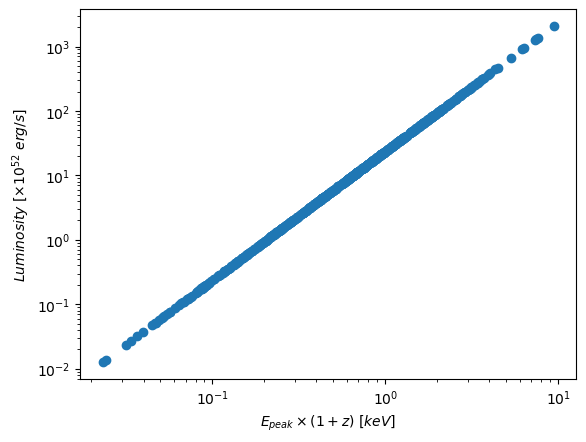

In [85]:
plt.scatter(E_peak_z/1e3,yonetoku_data["Lum"]/1e52)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$E_{peak} \times (1 + z)~[keV]$")
plt.ylabel(r"$Luminosity~[\times 10^{52}~erg/s]$")

## - - - - - - - - - - - - - 

## Fermi

(FERMIGBRST)

* 	trigger_time <= 2022-12-31 23:59:59.999 UTC
*  	t90 (s) <= 2

In [25]:
table = Table.read("fermi_results_short_2022.fits")
fermi_data_full = table.to_pandas()

In [26]:
fermi_data_full.columns[:30]

Index(['NAME', 'RA', 'DEC', 'TRIGGER_TIME', 'T90', 'T90_ERROR', 'T90_START',
       'FLUENCE', 'FLUENCE_ERROR', 'FLUX_1024', 'FLUX_1024_ERROR',
       'FLUX_1024_TIME', 'FLUX_64', 'FLUX_64_ERROR', 'FLNC_BAND_AMPL',
       'FLNC_BAND_AMPL_POS_ERR', 'FLNC_BAND_AMPL_NEG_ERR', 'FLNC_BAND_EPEAK',
       'FLNC_BAND_EPEAK_POS_ERR', 'FLNC_BAND_EPEAK_NEG_ERR', 'FLNC_BAND_ALPHA',
       'FLNC_BAND_ALPHA_POS_ERR', 'FLNC_BAND_ALPHA_NEG_ERR', 'FLNC_BAND_BETA',
       'FLNC_BAND_BETA_POS_ERR', 'FLNC_BAND_BETA_NEG_ERR',
       'FLNC_SPECTRUM_START', 'FLNC_SPECTRUM_STOP', 'PFLX_BEST_FITTING_MODEL',
       'PFLX_BEST_MODEL_REDCHISQ'],
      dtype='object')

In [27]:
fermi_data_full["FLNC_SBPL_STATISTIC"][557] == fermi_data_full["FLNC_SBPL_STATISTIC"][556]

True

In [28]:
fermi_data = fermi_data_full[['NAME', 'RA', 'DEC', 'T90',]]